# Data Processing Of Phase Screens
Authors: Clovis Faure and Gauri Padalkar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib widget

In [2]:
def pli(image):
    '''Function to plot an image in the conventional format'''
    #plt.close()
    return plt.imshow(image.T,origin="lower")


### Simulating a Phase Screen

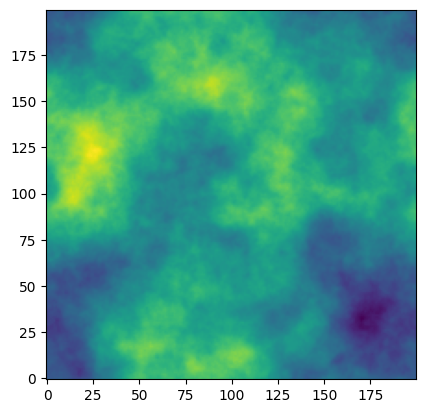

In [3]:
N=200
x = np.arange(N)-N//2
k2 = np.fft.fftshift(x[None,:]**2 + x[:,None]**2) + 1.0
pli(np.fft.fft2(k2**(-11/12) * np.exp(2j*np.pi*np.random.rand(N,N))).real) # Phase

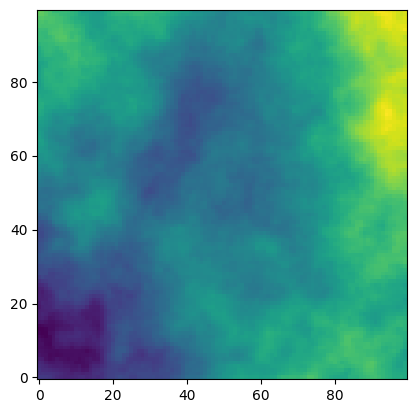

In [4]:
'''Taking a 100x100 crop of the 200x200 phase screen to get an unwrapped phase screen as we expect such an output from the optical bench'''
phase_img = np.fft.fft2(k2**(-11/12) * np.exp(2j*np.pi*np.random.rand(N,N))).real 
n = 100
phase = phase_img[0:n, 0:n] # Cropping to 100x100
pli(phase)

Text(0.5, 1.0, 'Autocorrelation')

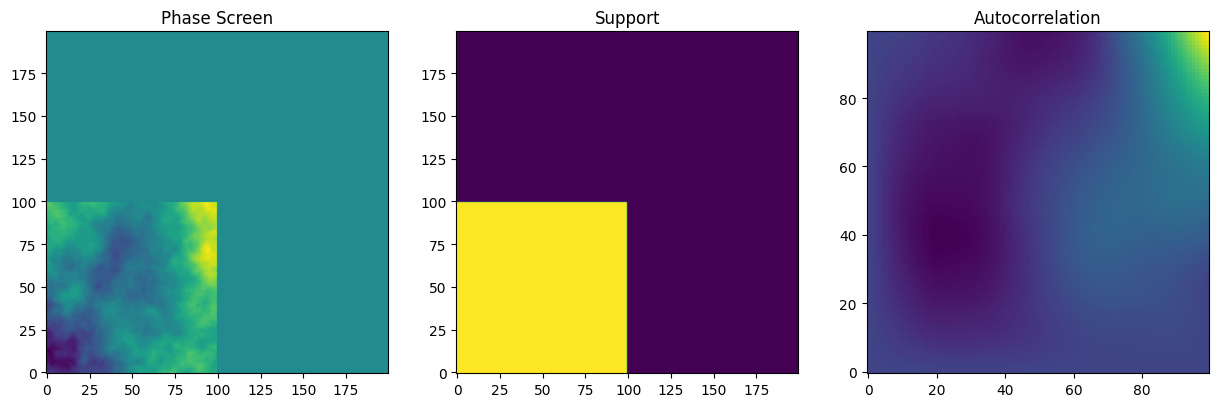

In [ ]:
b = np.zeros((2*n,2*n))
b[0:n,0:n] = phase
auto = (np.fft.ifft2(np.abs(np.fft.fft2(b))**2).real)/(n*n)
auto_shifted = np.fft.fftshift(auto)


support = np.zeros((2*n,2*n))
support[0:n,0:n] = 1
normalization = (np.fft.ifft2(np.abs(np.fft.fft2(support))**2).real)



plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
pli(b)
plt.title("Phase Screen")
plt.subplot(1,3,2)
pli(support)
plt.title("Support")
plt.subplot(1,3,3)
pli(auto_shifted)
plt.title("Autocorrelation")